# Part I - Introduction

### Competition
This Jupyter Notebook is aim to Present the solution to The Google's quest labelling challenge on Kaggle.

Machine can understand numbers easily, but they are hard to capture subjective opinions of Q&A ......

### Environment
Tensorflow: 2.3.0

CUDA: 10.1

CuDNN: 7.6

# Part II -  Data Analysis

### Load Data

**I downloaded the training and testing data from https://www.kaggle.com/c/google-quest-challenge/data.**

In [1]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

**We are going to predict 30 values instead of 1, and they are numerical numbers in [0,1].**

In [9]:
sample_submission.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673
3,132,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,...,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401
4,200,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,...,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074


**The training data has 41 columns: 1 id column, 10 features, and 30 targets.**

In [10]:
train_data.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


### Analyze Data

In [48]:
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'D:\ML\ml_env\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\ML\ml_env\Scripts\python.exe -m pip install --upgrade pip' command.


**It's important to know the distribution of the labels. We can see that some labels have pure 0 values.**

d:\ml\ml_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


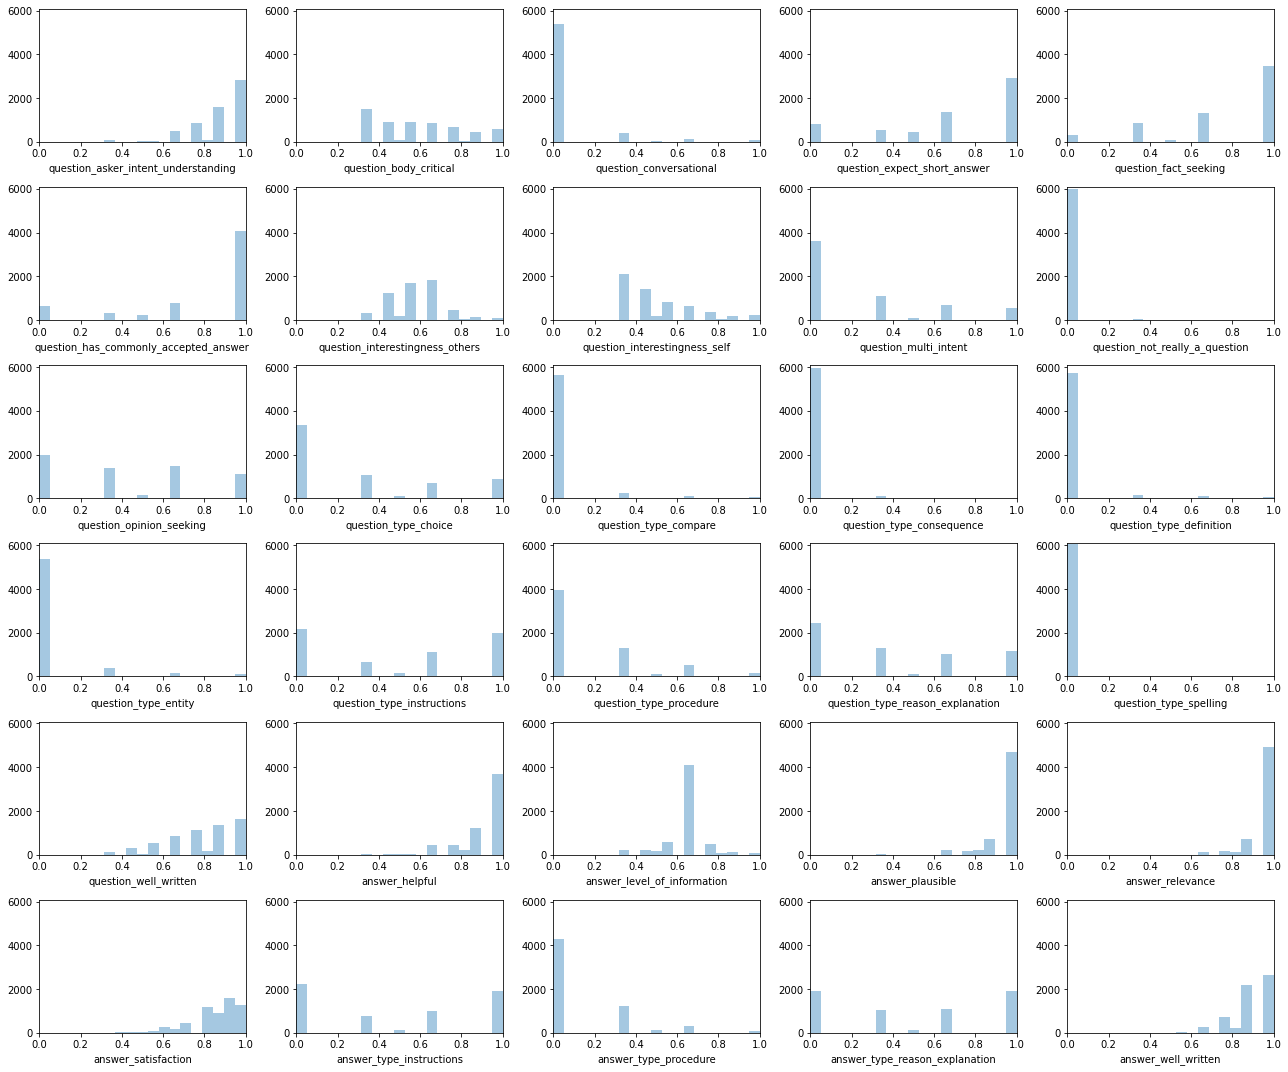

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(target_cols):
    ax = axes[i]
    sns.distplot(train_data[col], label=col, kde=False, bins=bins, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 6079])
    
plt.tight_layout()
plt.show()
plt.close()

# Part III - Data Preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, optimizers

**Let's see what features are useful to our training.**

In [3]:
feature_cols = train_data.columns[[1,2,5]]
target_cols = train_data.columns[11:]
print(feature_cols)
print(target_cols)

Index(['question_title', 'question_body', 'answer'], dtype='object')
Index(['question_asker_intent_understanding', 'question_body_critical',
       'question_conversational', 'question_expect_short_answer',
       'question_fact_seeking', 'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_

**Let's prepare data for BERT. We should first tokenize the data, encode a sentence in a way that it has a fixed length.**

In [4]:
from transformers import BertTokenizer
from tqdm import tqdm

MAX_LEN = 128
def preprocess(data):
    def fill_result_array(text, result_array):
        encoded_dict = tokenizer.encode_plus(text, truncation=True, padding='max_length', max_length=MAX_LEN)
        input_ids = encoded_dict['input_ids']
        attention_mask = encoded_dict['attention_mask']
        result_array[0].append(input_ids)
        result_array[1].append(attention_mask)
        
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    inputs_question, inputs_answer = [[] for _ in range(2)], [[] for _ in range(2)]
    for _, item in tqdm(data.iterrows()):
        title, question, answer = item
        fill_result_array(title + ' ' + question, inputs_question)
        fill_result_array(answer, inputs_answer)
    inputs = tf.concat([tf.constant(inputs_question), tf.constant(inputs_answer)], 0) # axis=0
        
    return inputs

inputs = preprocess(train_data[feature_cols])

6079it [00:36, 166.17it/s]


# Part IV - Model

**The model leverage bert as an embedding layer.**

In [5]:
from transformers import TFBertModel

def build_model():
    # input layers
    id_question = layers.Input((MAX_LEN,), dtype=tf.int32) 
    mask_question = layers.Input((MAX_LEN,), dtype=tf.int32)
    id_answer = layers.Input((MAX_LEN,), dtype=tf.int32)    
    mask_answer =  layers.Input((MAX_LEN,), dtype=tf.int32)
    # embedding layers
    encoder = TFBertModel.from_pretrained('bert-base-uncased')
    embedded_question = encoder(id_question, attention_mask=mask_question)[0] # last-hidden-state
    embedded_answer = encoder(id_answer, attention_mask=mask_answer)[0]
    # 
    q = layers.GlobalAveragePooling1D()(embedded_question)
    a = layers.GlobalAveragePooling1D()(embedded_answer)
    x = layers.Concatenate()([q, a])
    x = layers.Dropout(0.2)(x)   
    x = layers.Dense(30, activation='sigmoid')(x)

    model = models.Model(inputs=[id_question, mask_question, id_answer, mask_answer], outputs=x)
    return model

model = build_model()
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 128)]        0                                            
_______________________________________________________________________________________

# Part V - Training

In [6]:
target = tf.constant(train_data[target_cols])
train_x, valid_x = inputs[:, :5500, :], inputs[:, 5500:, :]
train_y, valid_y = target[:5500, :], target[5500:, :]

In [45]:
valid_y.shape

TensorShape([10, 30])

**I need to implement the spearman's r since it's not in Keras.**

**The formula is as follows:**

$$
r_s = \frac{cov(rg_x,rg_y)}{\sigma_{rgx}\sigma_{rgy}}
$$

**Since we have multiple labels, we need to do column-wise mean of spearman's r. There are some columns that has all 0 values which result in a NaN, so I'll just ignore these values.**

In [7]:
from scipy.stats import spearmanr
import numpy as np

class SpearmanRhoCallback(callbacks.Callback):
    def __init__(self, valid_x, valid_y):
        self.x = valid_x
        self.y = valid_y
    
    def on_epoch_end(self, epoch, logs):
        y_pred = self.model.predict(self.x)       
        batch_size, feature_size = self.y.shape
        r_vals = []
        for i in tqdm(range(feature_size)):
            r = spearmanr(self.y[:, i], y_pred[:, i]).correlation
            if not np.isnan(r):
                r_vals.append(r)
        rho_val = np.mean(r_vals)
        print('spearman-rho: %s\n' % (str(round(rho_val, 4))))
        return rho_val

**I'm using binary_crossentropy as the loss function because it's a multilabel classification problem. The activation function for the output layer will be sigmoid instead of softmax. The formula is as follows:**

$$
H(p)_q = \frac{1}{N}\sum plog(q) + (1-p)log(1-q)
$$

In [8]:
early_stopping_cb = callbacks.EarlyStopping(patience=1, restore_best_weights=True)
rho_cb = SpearmanRhoCallback([valid_x[0], valid_x[1], valid_x[2], valid_x[3]], valid_y)

optimizer = optimizers.Adam(learning_rate=2e-5)
model.compile(loss='binary_crossentropy', \
              optimizer=optimizer)
model.fit([train_x[0],train_x[1],train_x[2],train_x[3]], \
          train_y, \
          validation_data=([valid_x[0], valid_x[1], valid_x[2], valid_x[3]], valid_y), \
          callbacks=[early_stopping_cb, rho_cb], \
          epochs=30, \
          batch_size=3)

Epoch 1/30
1834/1834 [==============================] - ETA: 0s - loss: 0.3946WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0071s vs `on_test_batch_end` time: 0.1127s). Check your callbacks.


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]d:\ml\ml_env\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
d:\ml\ml_env\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
d:\ml\ml_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
d:\ml\ml_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
d:\ml\ml_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 836.17it/s]

spearman-rho: 0.3616

1834/1834 [==============================] - 930s 507ms/step - loss: 0.3946 - val_loss: 0.3763


Epoch 2/30
1834/1834 [==============================] - ETA: 0s - loss: 0.3673

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1003.93it/s]

spearman-rho: 0.3846

1834/1834 [==============================] - 944s 515ms/step - loss: 0.3673 - val_loss: 0.3728


Epoch 3/30
1834/1834 [==============================] - ETA: 0s - loss: 0.3504

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1002.64it/s]

spearman-rho: 0.3846

1834/1834 [==============================] - 940s 513ms/step - loss: 0.3504 - val_loss: 0.3736


# Part VI - Evaluation

**I'm going to use Spearman's Rank Correlation Coefficient as the evaluation metric.** 

In [19]:
# explain
sample_submission.iloc[:, 1:] = y_pred
sample_submission.to_csv('submission.csv', index=False)